Observations

1. Capomulin and Ramicane are the two drugs that seem to shrink the tumor volume the most.
2. The correlation between mouse weight and average tumor volume is .84. This means that there is a strong positive correlation between weight and tumor volume
3. The Capomulin Treatmeant of Mouse R554 graph shows that capomulin shrinks the tumor more during the first 15 days than it does during the last 30 days of treatment.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_df = pd.merge(study_results, mouse_metadata, on= "Mouse ID", how= "left")

# Display the data table for preview
study_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
#Summary Statistics
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
stats_df = study_df.groupby(study_df["Drug Regimen"])

mean = stats_df["Tumor Volume (mm3)"].mean()
median = stats_df["Tumor Volume (mm3)"].median()
variance = stats_df["Tumor Volume (mm3)"].var()
std = stats_df["Tumor Volume (mm3)"].std()
sem = stats_df.sem()["Tumor Volume (mm3)"]


summary_df = pd.DataFrame({"Mean": mean,
                          "Median": median,
                          "Tumor": variance,
                          "Std": std,
                          "SEM": sem})
summary_df

,Mean,Median,Tumor,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
    
# This method produces everything in a single groupby function
single_groupby = study_df.groupby("Drug Regimen")
summary_2 = single_groupby.agg(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
summary_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


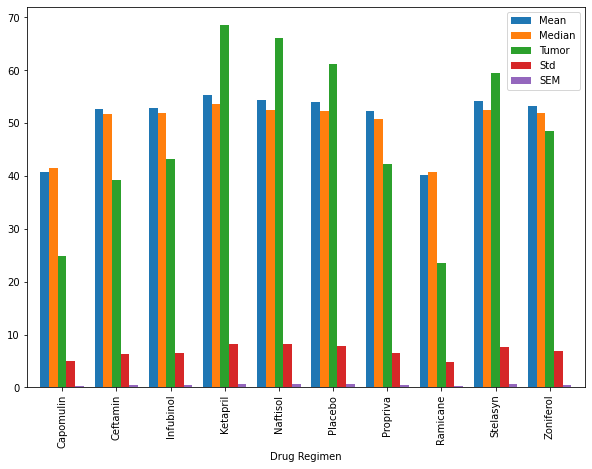

<Figure size 432x288 with 0 Axes>

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
summary_df.plot(kind= "bar", figsize = (10,7) ,rot=90, width=.8)
plt.show()
plt.savefig("Images/summary.png")

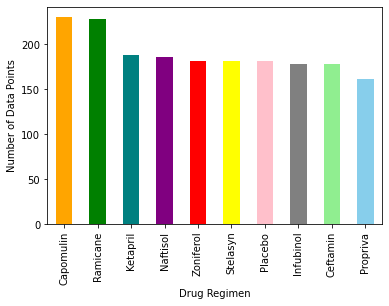

<Figure size 432x288 with 0 Axes>

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
color = ["orange", "green", "teal", "purple", "red", "yellow", "pink", "grey", "lightgreen", "skyblue"]
study_df["Drug Regimen"].value_counts(sort=True).plot.bar(color=color)
plt.xticks(rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.show()
plt.savefig("Images/data_points.png")

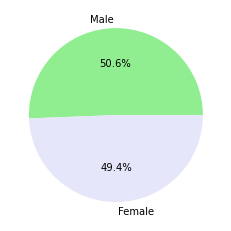

<Figure size 432x288 with 0 Axes>

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts= study_df["Sex"].value_counts()
colors= ["lightgreen", "lavender"]
plt.pie(counts.values,autopct="%1.1f%%", colors=colors, labels = counts.index )
plt.show()
plt.savefig("Images/mf.png")

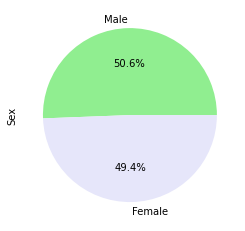

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts= study_df["Sex"].value_counts()
colors= ["lightgreen", "lavender"]
counts.plot(kind="pie", colors=colors, autopct="%1.1f%%")
plt.show()

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Quantitatively determine capomulin outliers

capomulin_df = study_df.loc[study_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = study_df.loc[study_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = study_df.loc[study_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = study_df.loc[study_df["Drug Regimen"] == "Ceftamin", :]

#Capomulin
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_vol, study_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge.head()

#Ramicane
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge = pd.merge(ramicane_vol, study_df, on=("Mouse ID","Timepoint"),how="left")

#Infubinol
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_vol, study_df, on=("Mouse ID","Timepoint"),how="left")

#Ceftamin
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_vol, study_df, on=("Mouse ID","Timepoint"),how="left")

In [9]:
# Quantitatively determine capomulin outliers
capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]

quartiles =capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [10]:
# Quantitatively determine ramicane outliers
ramicane_tumors = ramicane_merge["Tumor Volume (mm3)"]

quartiles =ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [11]:
# Quantitatively determine infubinol outliers
infubinol_tumors = infubinol_merge["Tumor Volume (mm3)"]

quartiles =infubinol_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [12]:
# Quantitatively determine ceftamin outliers
ceftamin_tumors = ceftamin_merge["Tumor Volume (mm3)"]

quartiles = ceftamin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


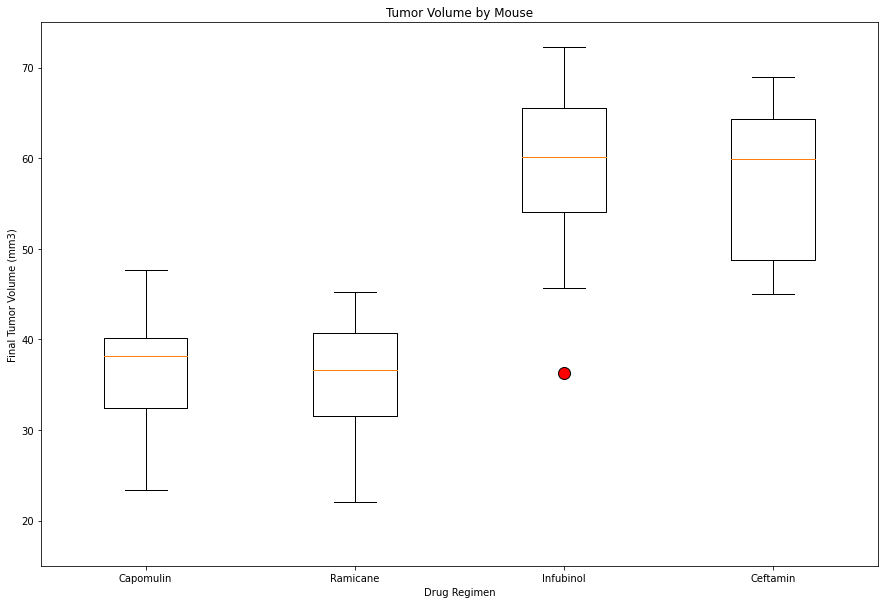

<Figure size 432x288 with 0 Axes>

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_data = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceftamin_tumors]
drug_regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#Plot the Data
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Tumor Volume by Mouse")
ax1.set_ylabel("Final Tumor Volume (mm3)",)
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_data, labels=drug_regimen, widths = 0.4, flierprops=flierprops)

plt.ylim(15, 75)

plt.show()
plt.savefig("Images/box.png")

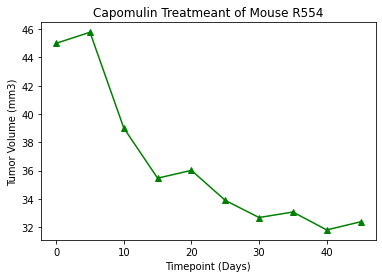

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = capomulin_df.loc[capomulin_df["Mouse ID"]== "r554",:]

x_axis = mouse_capomulin["Timepoint"]
y_axis = mouse_capomulin["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis, marker="^",color="green")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatmeant of Mouse R554")
plt.savefig("Images/mouseR554.png")

Text(0.5, 1.0, 'Capomulin Treatment Tumor and Weight Relation')

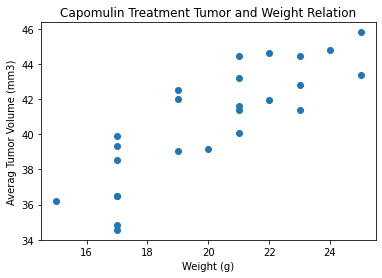

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
avg = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(avg["Weight (g)"], avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")
plt.title("Capomulin Treatment Tumor and Weight Relation")

The correlation between mouse weight and average tumor volume is 0.84


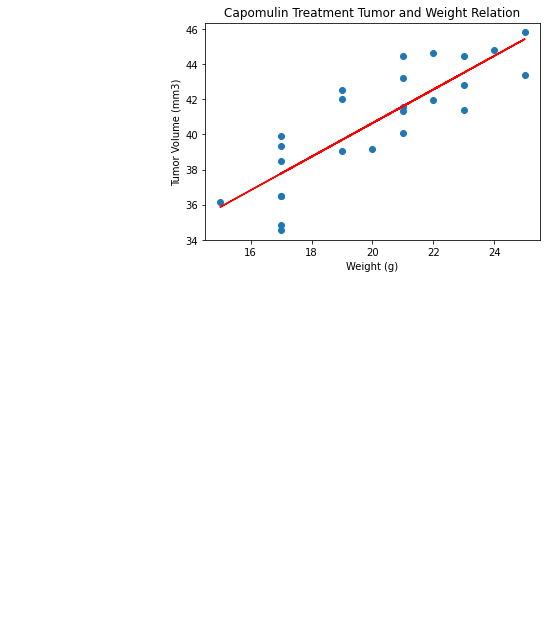

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(avg["Weight (g)"],avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

x_values = avg["Weight (g)"]
y_values = avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (8,12), color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment Tumor and Weight Relation")
plt.show()
plt.savefig("Images/weight.png")